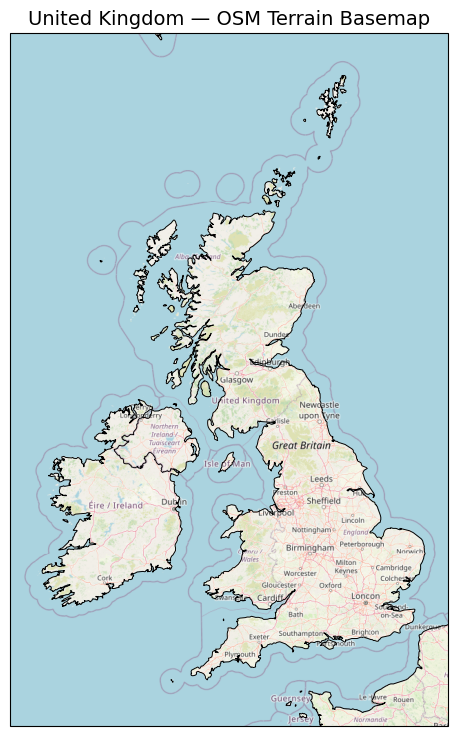

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import OSM

# ---- UK extent (West, East, South, North) ----
extent = (-11.5, 2.5, 49.0, 61.5)

# Use OpenStreetMap tiles
tiler = OSM()
mercator = tiler.crs

# ---- Plot ----
fig = plt.figure(figsize=(7, 9))
ax = plt.axes(projection=mercator)

# Add basemap (zoom 6 is good for UK)
ax.add_image(tiler, 6)

# Set extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add borders & coastlines
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)

plt.title("United Kingdom — OSM Terrain Basemap", fontsize=14)
plt.show()


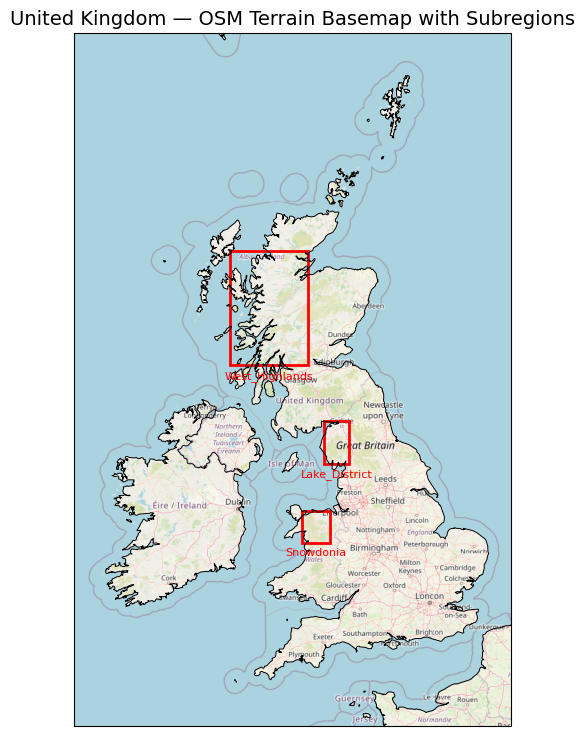

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import OSM

# ---- UK extent (West, East, South, North) ----
extent = (-11.5, 2.5, 49.0, 61.5)

# Subregions (bounding boxes)
SUBREGIONS = {
    "West_Highlands": dict(north=58.0, south=56.0, west=-6.5, east=-4.0),
    "Lake_District":  dict(north=55.0, south=54.2, west=-3.5, east=-2.7),
    "Snowdonia":      dict(north=53.3, south=52.7, west=-4.2, east=-3.3),
}

# Use OpenStreetMap tiles
tiler = OSM()
mercator = tiler.crs

# ---- Plot ----
fig = plt.figure(figsize=(7, 9))
ax = plt.axes(projection=mercator)

# Add basemap (zoom 6 is good for UK)
ax.add_image(tiler, 6)

# Set extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add borders & coastlines
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)

# Highlight subregions in red
for name, bbox in SUBREGIONS.items():
    width  = bbox["east"] - bbox["west"]
    height = bbox["north"] - bbox["south"]
    rect = Rectangle(
        (bbox["west"], bbox["south"]),
        width, height,
        linewidth=2, edgecolor="red", facecolor="none",
        transform=ccrs.PlateCarree()
    )
    ax.add_patch(rect)
    # Add label
    ax.text(
        bbox["west"] + width/2, bbox["south"] - 0.1,
        name, color="red", fontsize=8,
        ha="center", va="top", transform=ccrs.PlateCarree()
    )

plt.title("United Kingdom — OSM Terrain Basemap with Subregions", fontsize=14)
plt.show()
